In [93]:
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
import os

if not os.path.exists("charts"):
    os.makedirs("charts")

df = pd.read_csv("combined_results.csv")

In [95]:
df.sample(10)

,framework,measurer,prompt_size,output_size,iterations,average,max,min,std,gpu_usage
44,together,tpot,660,512,10.0,0.010399,0.010951,0.009900,1.526232e-07,none
28,exllama,tpot,660,128,10.0,0.030428,0.030713,0.030134,4.057101e-08,8.774086475372314
17,baseline,ttft,660,none,10.0,1.695702,2.249421,1.620012,3.409376e-02,4.88194465637207
40,together,tpot,17,512,10.0,0.011069,0.021907,0.009609,1.308652e-05,none
58,vllm,tpot,660,128,10.0,0.024160,0.024431,0.023653,4.651850e-08,10.109276294708252
60,vllm,ttft,17,none,10.0,0.082210,0.093810,0.077383,1.727370e-05,11.40824031829834
26,exllama,tpot,191,128,10.0,0.022501,0.022656,0.022422,3.555938e-09,8.774086475372314
4,baseline,throughput,191,512,10.0,2.497006,2.501724,2.484667,2.135531e-05,4.795303821563721
25,exllama,tpot,17,512,10.0,0.020562,0.020676,0.020496,4.197455e-09,8.774086475372314
12,baseline,tpot,191,512,10.0,0.766665,0.767318,0.766080,1.999038e-07,4.890617370605469


In [96]:
colors = {"exllama": "blue", "vllm": "green",
          "together": "red", "baseline": "orange"}

In [97]:
df_ttft = df[df["measurer"] == "ttft"]
df_tpot = df[df["measurer"] == "tpot"]
df_throughput = df[df["measurer"] == "throughput"]

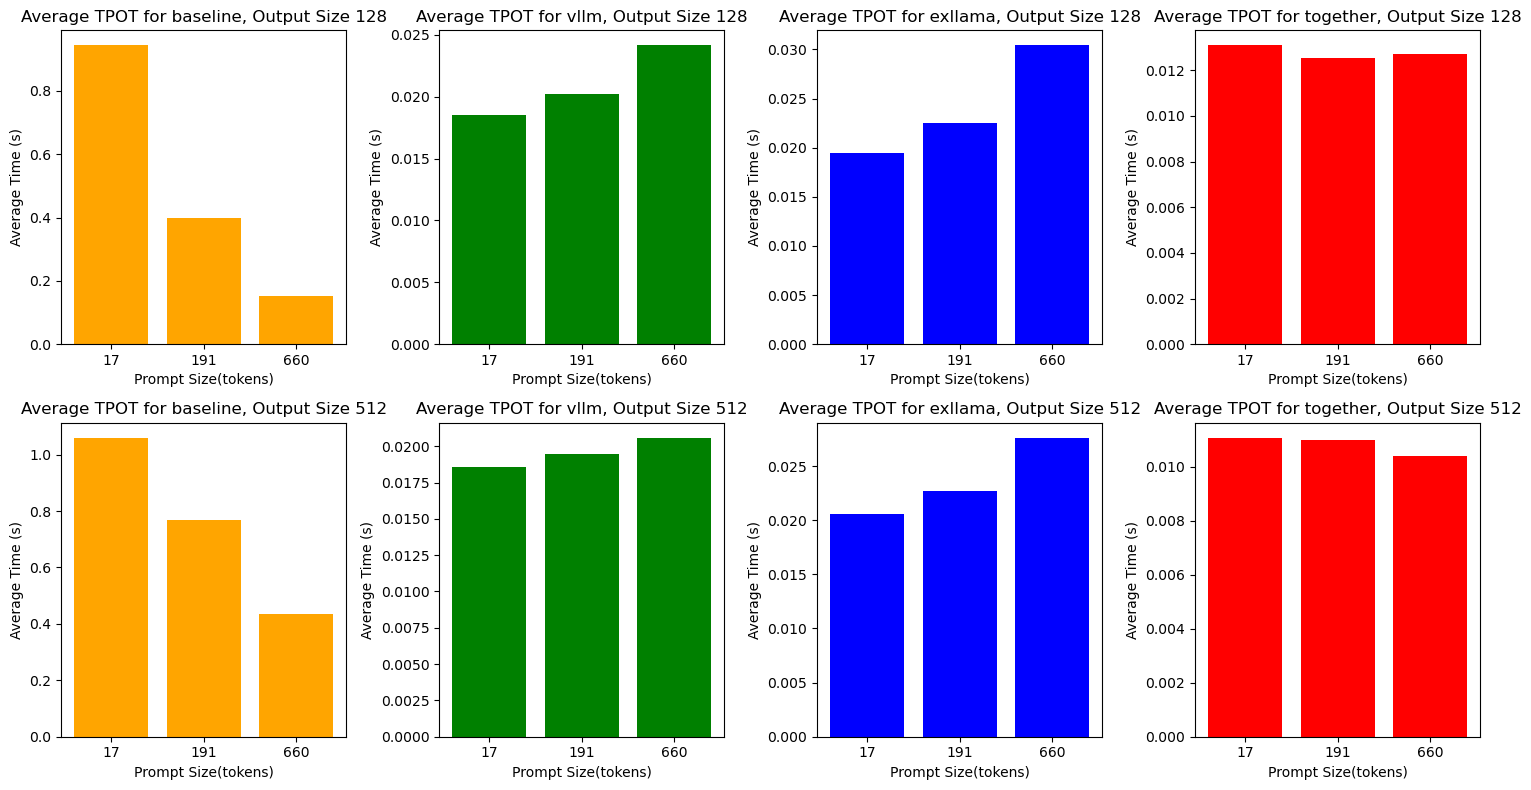

In [98]:


# Create bar graphs
frameworks = ["baseline", "vllm", "exllama", "together"]
prompt_sizes = [17, 191, 660]
output_sizes = ["128", "512"]
fig, axs = plt.subplots(len(output_sizes), len(frameworks), figsize=(15, 8))
# fig.suptitle("Average TPOT with output size " +
#              output_size + " for different frameworks", fontsize=16)

for k, output_size in enumerate(output_sizes):
    for i, framework in enumerate(frameworks):
        for j, prompt_size in enumerate(prompt_sizes):
            df_to_plot = df_tpot[df_tpot["framework"] == framework]
            df_to_plot = df_to_plot[df_to_plot["output_size"] == output_size]

            # change type to str
            df_to_plot["prompt_size"] = df_to_plot["prompt_size"].astype(str)

            axs[k][i].bar(df_to_plot["prompt_size"], df_to_plot["average"], color=[colors[x]
                                                                                   for x in df_to_plot["framework"]])
        axs[k][i].set_title(
            f"Average TPOT for {framework}, Output Size {output_size}")
        axs[k][i].set_xlabel("Prompt Size(tokens)")
        axs[k][i].set_ylabel("Average Time (s)")

plt.tight_layout()
# plt.show()
plt.savefig("charts/self_tpot_varying_input_size.png")

In [99]:
df_17 = df_ttft[df_ttft["prompt_size"] == 17]
df_191 = df_ttft[df_ttft["prompt_size"] == 191]
df_660 = df_ttft[df_ttft["prompt_size"] == 660]

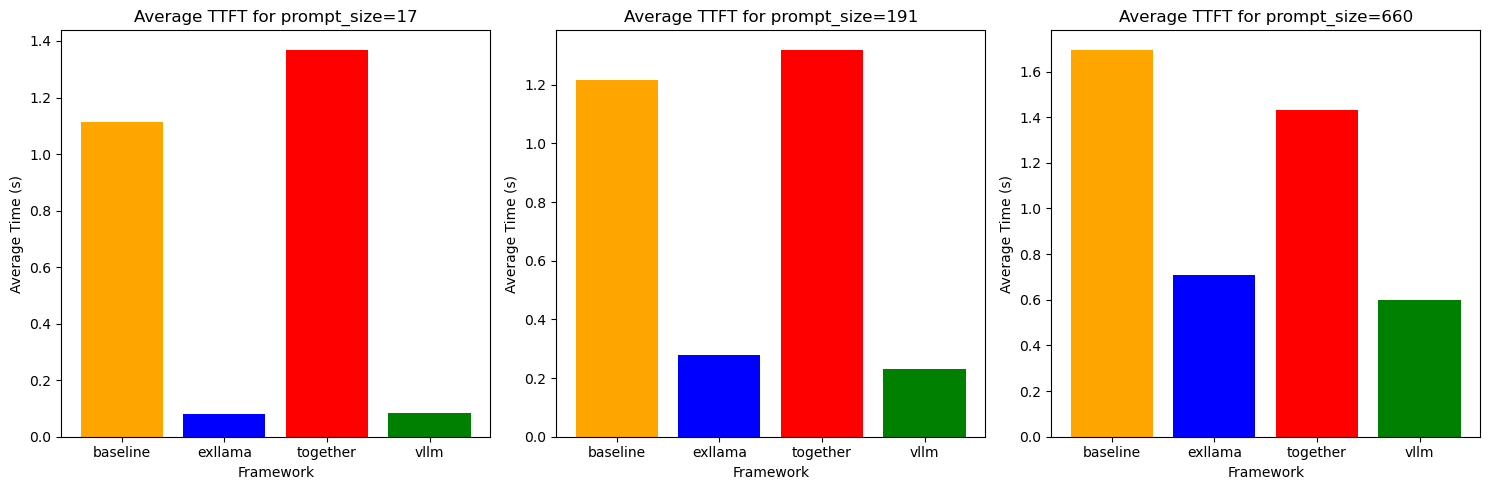

In [100]:

# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(df_17["framework"], df_17["average"], color=[colors[x]
           for x in df_17["framework"]])
axs[0].set_title("Average TTFT for prompt_size=17")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=191
axs[1].bar(df_191["framework"], df_191["average"], color=[colors[x]
           for x in df_191["framework"]])
axs[1].set_title("Average TTFT for prompt_size=191")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=660
axs[2].bar(df_660["framework"], df_660["average"], color=[colors[x]
           for x in df_660["framework"]])
axs[2].set_title("Average TTFT for prompt_size=660")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Average Time (s)")

plt.tight_layout()
# plt.show()
plt.savefig("charts/ttft_average.png")

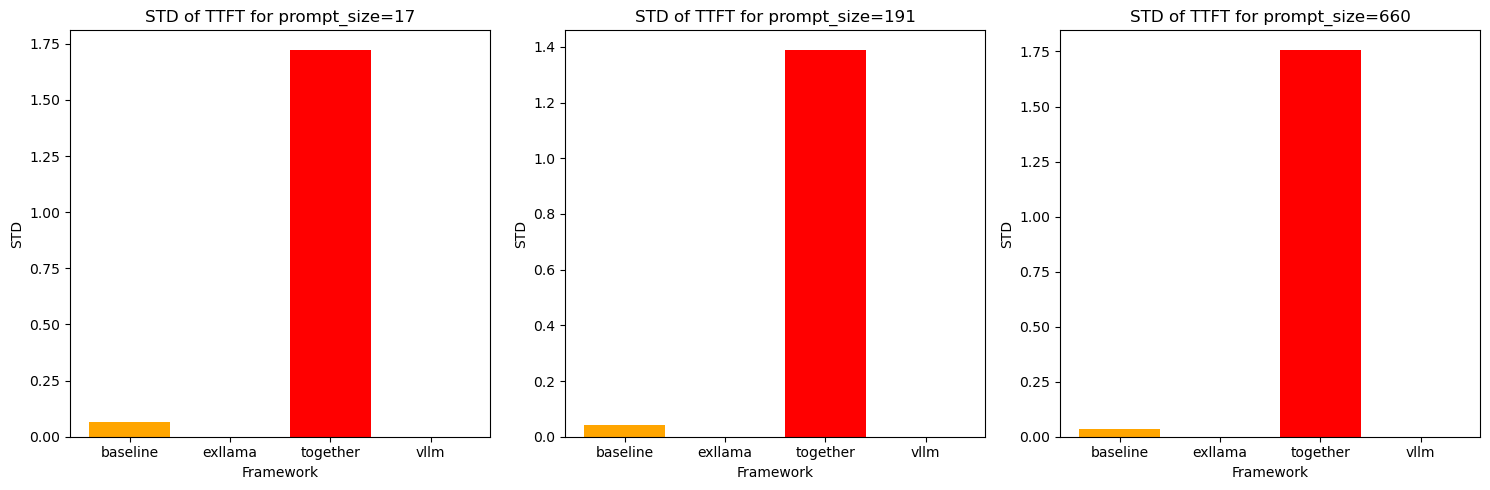

In [101]:
# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(
    df_17["framework"], df_17["std"], color=[colors[x]
                                             for x in df_17["framework"]]
)
axs[0].set_title("STD of TTFT for prompt_size=17")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("STD")

# Bar graph for prompt_size=191
axs[1].bar(
    df_191["framework"],
    df_191["std"],
    color=[colors[x] for x in df_191["framework"]],
)
axs[1].set_title("STD of TTFT for prompt_size=191")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("STD")

# Bar graph for prompt_size=660
axs[2].bar(
    df_660["framework"],
    df_660["std"],
    color=[colors[x] for x in df_660["framework"]],
)
axs[2].set_title("STD of TTFT for prompt_size=660")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("STD")

plt.tight_layout()
# plt.show()
plt.savefig("charts/ttft_std.png")

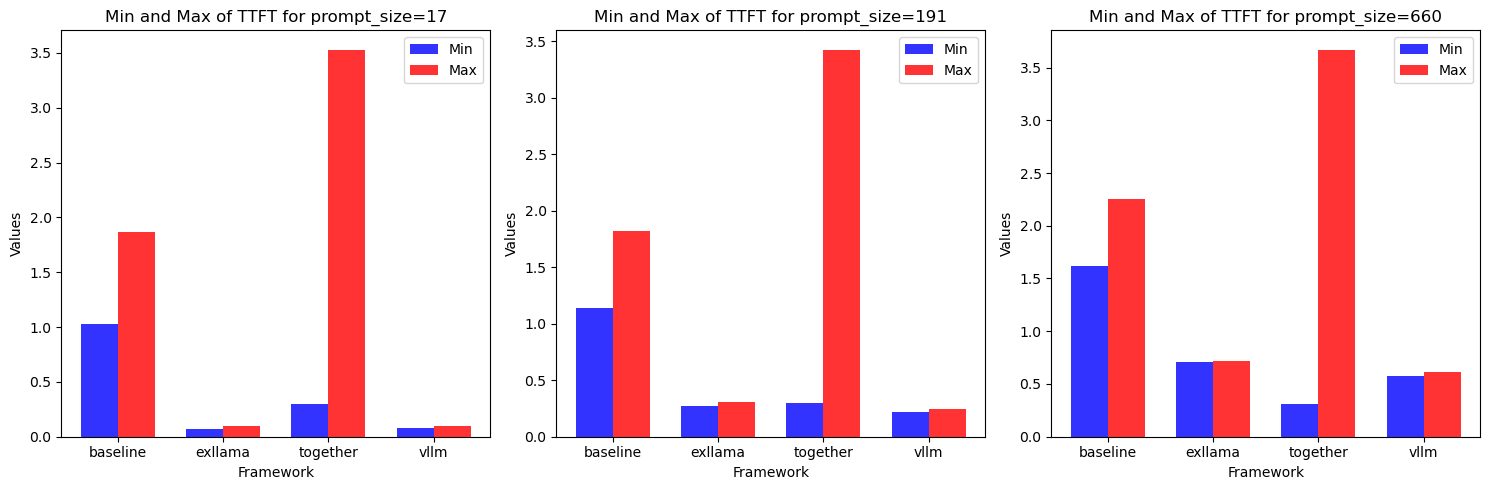

In [102]:
import numpy as np

# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
bar_width = 0.35
opacity = 0.8

# Bar graph for prompt_size=17
bar1 = axs[0].bar(np.arange(len(df_17["framework"])) - bar_width/2,
                  df_17["min"], bar_width, alpha=opacity, color='b', label='Min')
bar2 = axs[0].bar(np.arange(len(df_17["framework"])) + bar_width/2,
                  df_17["max"], bar_width, alpha=opacity, color='r', label='Max')
axs[0].set_title("Min and Max of TTFT for prompt_size=17")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Values")
axs[0].set_xticks(np.arange(len(df_17["framework"])))
axs[0].set_xticklabels(df_17["framework"])
axs[0].legend()

# Bar graph for prompt_size=191
bar1 = axs[1].bar(np.arange(len(df_191["framework"])) - bar_width/2,
                  df_191["min"], bar_width, alpha=opacity, color='b', label='Min')
bar2 = axs[1].bar(np.arange(len(df_191["framework"])) + bar_width/2,
                  df_191["max"], bar_width, alpha=opacity, color='r', label='Max')
axs[1].set_title("Min and Max of TTFT for prompt_size=191")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Values")
axs[1].set_xticks(np.arange(len(df_191["framework"])))
axs[1].set_xticklabels(df_191["framework"])
axs[1].legend()

# Bar graph for prompt_size=660
bar1 = axs[2].bar(np.arange(len(df_660["framework"])) - bar_width/2,
                  df_660["min"], bar_width, alpha=opacity, color='b', label='Min')
bar2 = axs[2].bar(np.arange(len(df_660["framework"])) + bar_width/2,
                  df_660["max"], bar_width, alpha=opacity, color='r', label='Max')
axs[2].set_title("Min and Max of TTFT for prompt_size=660")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Values")
axs[2].set_xticks(np.arange(len(df_660["framework"])))
axs[2].set_xticklabels(df_660["framework"])
axs[2].legend()

plt.tight_layout()
# plt.show()
plt.savefig("charts/ttft_min_max.png")

In [103]:
df_17_128 = df_tpot[(df_tpot["prompt_size"] == 17) &
                    (df_tpot["output_size"] == "128")]
df_191_128 = df_tpot[(df_tpot["prompt_size"] == 191) &
                     (df_tpot["output_size"] == "128")]
df_660_128 = df_tpot[(df_tpot["prompt_size"] == 660) &
                     (df_tpot["output_size"] == "128")]

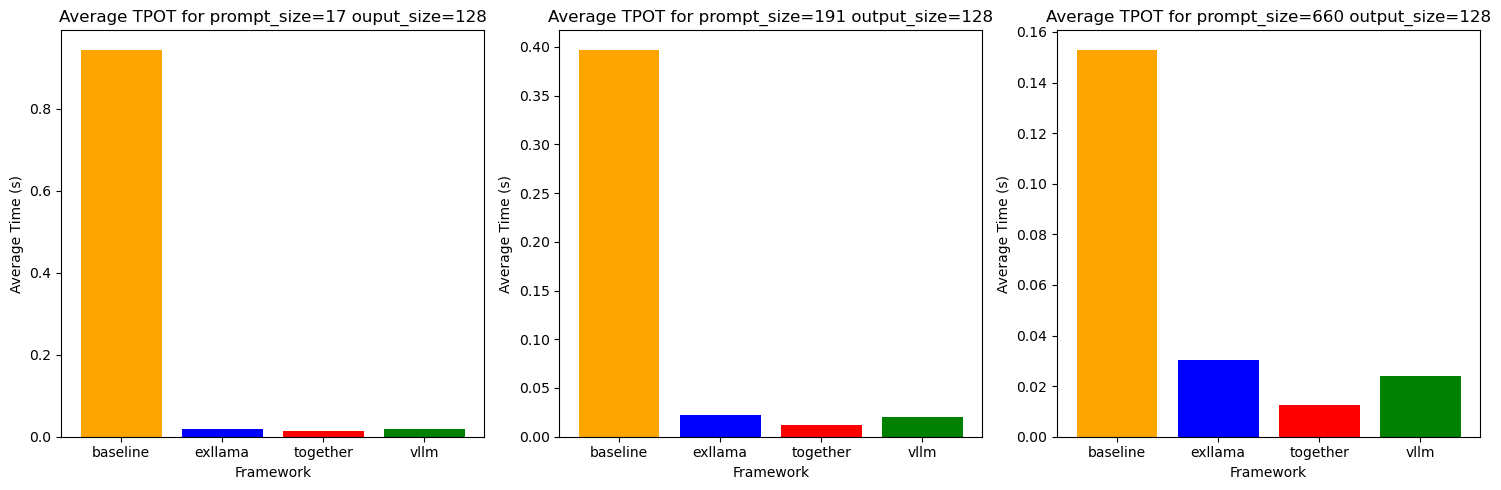

In [104]:
# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(
    df_17_128["framework"], df_17_128["average"], color=[colors[x]
                                                         for x in df_17_128["framework"]]
)
axs[0].set_title("Average TPOT for prompt_size=17 ouput_size=128")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=191
axs[1].bar(
    df_191_128["framework"],
    df_191_128["average"],
    color=[colors[x] for x in df_191_128["framework"]],
)
axs[1].set_title("Average TPOT for prompt_size=191 output_size=128")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=660
axs[2].bar(
    df_660_128["framework"],
    df_660_128["average"],
    color=[colors[x] for x in df_660_128["framework"]],
)
axs[2].set_title("Average TPOT for prompt_size=660 output_size=128")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Average Time (s)")

plt.tight_layout()
# plt.show()
plt.savefig("charts/tpot_average.png")

In [105]:
df_17_128_no_baseline = df_tpot[(df_tpot["prompt_size"] == 17) & (
    df_tpot["output_size"] == "128") & (df_tpot["framework"] != "baseline")]
df_191_128_no_baseline = df_tpot[(df_tpot["prompt_size"] == 191) & (
    df_tpot["output_size"] == "128") & (df_tpot["framework"] != "baseline")]
df_660_128_no_baseline = df_tpot[(df_tpot["prompt_size"] == 660) & (
    df_tpot["output_size"] == "128") & (df_tpot["framework"] != "baseline")]

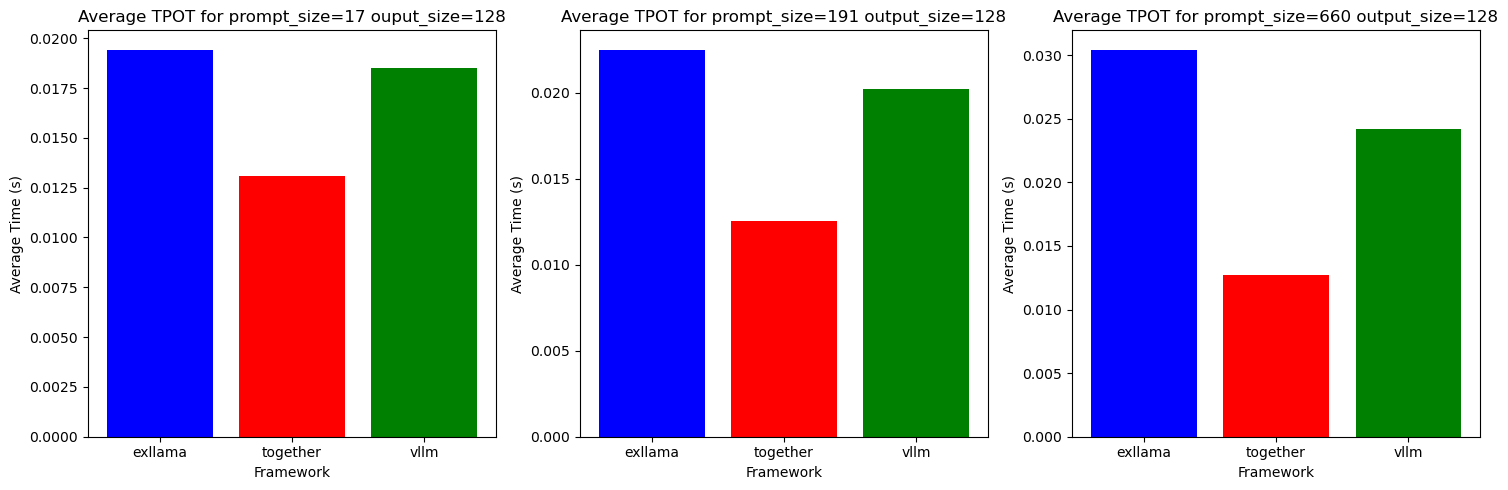

In [106]:
# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(
    df_17_128_no_baseline["framework"],
    df_17_128_no_baseline["average"],
    color=[colors[x] for x in df_17_128_no_baseline["framework"]],
)
axs[0].set_title("Average TPOT for prompt_size=17 ouput_size=128")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=191
axs[1].bar(
    df_191_128_no_baseline["framework"],
    df_191_128_no_baseline["average"],
    color=[colors[x] for x in df_191_128_no_baseline["framework"]],
)
axs[1].set_title("Average TPOT for prompt_size=191 output_size=128")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=660
axs[2].bar(
    df_660_128_no_baseline["framework"],
    df_660_128_no_baseline["average"],
    color=[colors[x] for x in df_660_128_no_baseline["framework"]],
)
axs[2].set_title("Average TPOT for prompt_size=660 output_size=128")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Average Time (s)")

plt.tight_layout()
# plt.show()
plt.savefig("charts/tpot_average_no_HF.png")

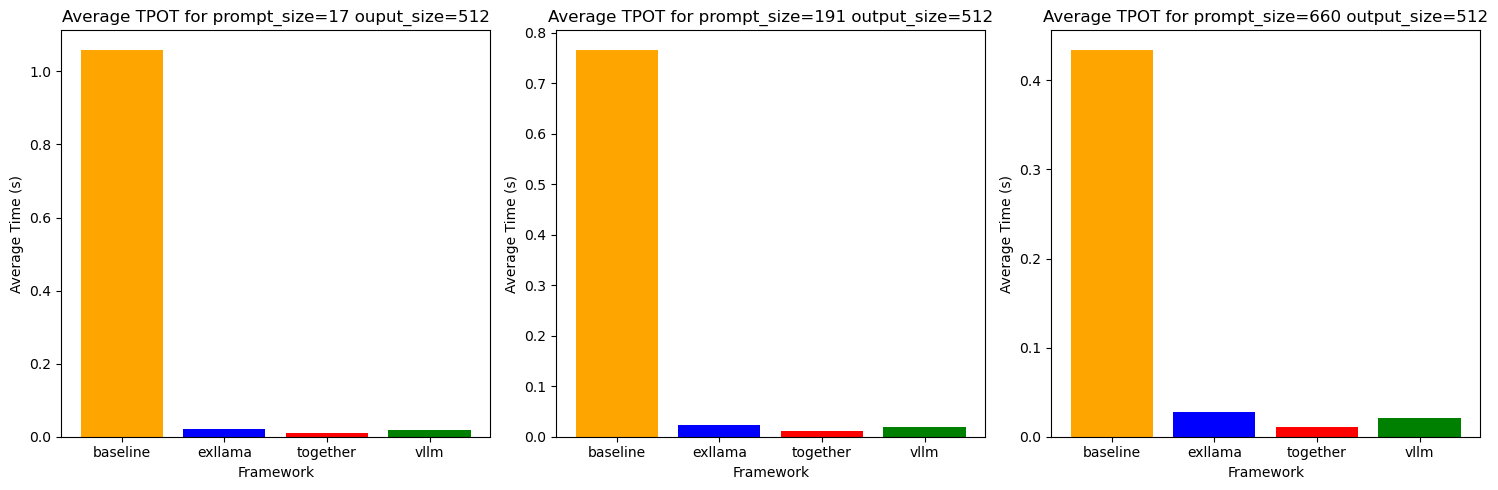

In [107]:
df_17_512 = df_tpot[(df_tpot["prompt_size"] == 17) &
                    (df_tpot["output_size"] == "512")]
df_191_512 = df_tpot[(df_tpot["prompt_size"] == 191) &
                     (df_tpot["output_size"] == "512")]
df_660_512 = df_tpot[(df_tpot["prompt_size"] == 660) &
                     (df_tpot["output_size"] == "512")]

# Create bar graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for prompt_size=17
axs[0].bar(
    df_17_512["framework"],
    df_17_512["average"],
    color=[colors[x] for x in df_17_512["framework"]],
)
axs[0].set_title("Average TPOT for prompt_size=17 ouput_size=512")
axs[0].set_xlabel("Framework")
axs[0].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=191
axs[1].bar(
    df_191_512["framework"],
    df_191_512["average"],
    color=[colors[x] for x in df_191_512["framework"]],
)
axs[1].set_title("Average TPOT for prompt_size=191 output_size=512")
axs[1].set_xlabel("Framework")
axs[1].set_ylabel("Average Time (s)")

# Bar graph for prompt_size=660
axs[2].bar(
    df_660_512["framework"],
    df_660_512["average"],
    color=[colors[x] for x in df_660_512["framework"]],
)
axs[2].set_title("Average TPOT for prompt_size=660 output_size=512")
axs[2].set_xlabel("Framework")
axs[2].set_ylabel("Average Time (s)")

plt.tight_layout()
# plt.show()
plt.savefig("charts/tpot_average.png")

In [108]:
df_gpu = df.replace("none", 0)

In [109]:
df_gpu["gpu_usage"] = df_gpu["gpu_usage"].astype(float)

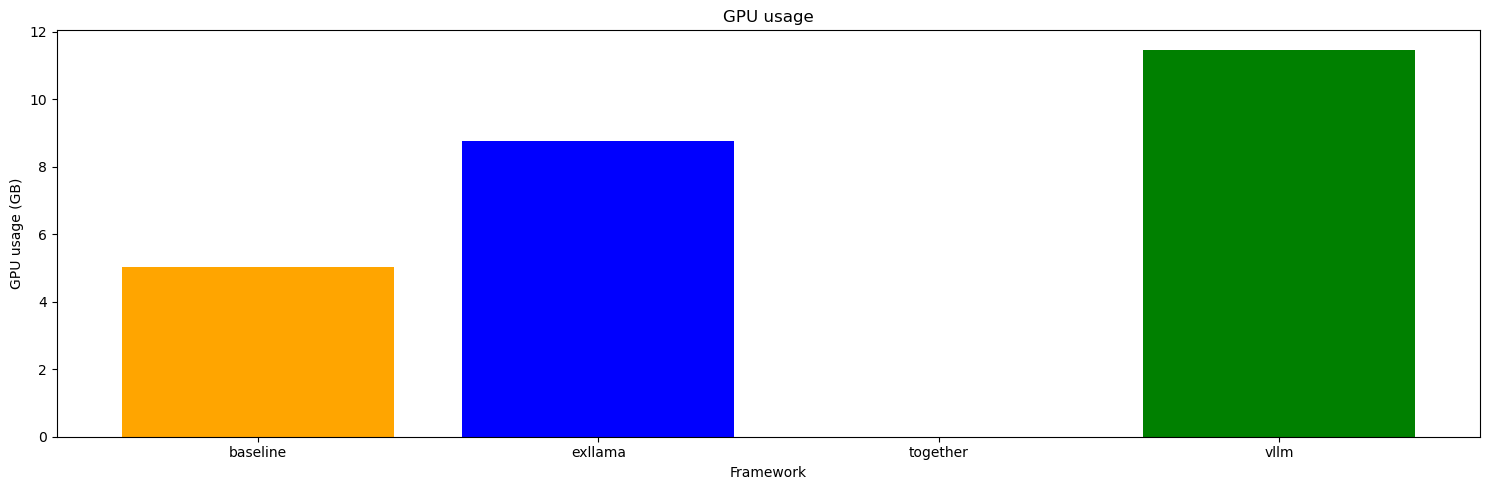

In [110]:
# Create bar graphs
fig, axs = plt.subplots(figsize=(15, 5))

axs.bar(
    df_gpu["framework"], df_gpu["gpu_usage"], color=[colors[x]
                                                     for x in df_gpu["framework"]]
)
axs.set_title("GPU usage")
axs.set_xlabel("Framework")

axs.set_ylabel("GPU usage (GB)")


plt.tight_layout()
# plt.show()
plt.savefig("charts/gpu.png")